In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import show, output_file
#from bokeh.plotting import figure
from sklearn.preprocessing import StandardScaler

import scipy.stats

import os

import bokeh
from bokeh.plotting import figure, output_notebook, show

import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)


bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [41]:
!pip install scipy


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv("./go_aggregated_5.0.tsv", sep="\t", header=0)#, index_col=0)

In [3]:
df.head()

,id,study_id,sample_id,biome,exptype,version,GO:0043130,GO:0055074,GO:0055117,GO:0046933,...,GO:0019357,GO:0006527,GO:0004114,GO:0046423,GO:0034194,GO:0032183,GO:0007618,GO:0030097,GO:0004520,GO:0033739
0,ERZ650344,MGYS00003358,SRS3210273,root:Environmental:Aquatic:Marine:Brackish,assembly,4.1,3,0,0,342,...,2,79,90,0,20,0,0,0,87,38
1,ERZ747221,MGYS00004737,SRS1791943,root:Engineered:Biogas plant,assembly,4.1,49,0,0,450,...,2,110,0,0,15,0,0,0,204,34
2,ERZ761615,MGYS00003390,SRS1984850,root:Engineered:Bioreactor,assembly,4.1,2,0,0,270,...,33,102,2,0,43,0,0,0,93,49
3,ERR2193276,MGYS00005065,ERS2001073,root:Host-associated:Mammals,metagenomic,4.1,0,0,0,26,...,0,12,1,0,15,0,0,0,8,5
4,ERR2193277,MGYS00005065,ERS2001074,root:Host-associated:Mammals,metagenomic,4.1,0,0,0,31,...,0,13,1,0,20,0,0,0,10,8


In [9]:
df_new_all = pd.read_csv("./InterProScan_output_MGnify_GO/ERZ652362_FASTA.InterProScan.tsv.out", sep="\t", header=None, index_col=0)

In [10]:
df_new_all

,1,2,3
0,,,
GO:0055085,transmembrane transport,biological_process,1166
GO:0006355,"regulation of transcription, DNA-templated",biological_process,1027
GO:0005975,carbohydrate metabolic process,biological_process,944
GO:0000160,phosphorelay signal transduction system,biological_process,438
GO:0007165,signal transduction,biological_process,343
...,...,...,...
GO:0050511,undecaprenyldiphospho-muramoylpentapeptide bet...,molecular_function,1
GO:0050567,glutaminyl-tRNA synthase (glutamine-hydrolyzin...,molecular_function,1
GO:0051266,sirohydrochlorin ferrochelatase activity,molecular_function,1


In [75]:
df_GO = pd.read_csv("../go_kgx_tsv/go_kgx_tsv_nodes.tsv", sep="\t", header=0, index_col=0)
df_GO

/Users/marcin/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,10,13,14,19,20,21,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,category,name,description,provided_by,synonym,0000233,0000589,0100001,comment,consider,...,has_alternative_id,has_db_xref,has_o_b_o_format_version,has_o_b_o_namespace,is_class_level,is_metadata_tag,license,shorthand,type,version
id,,,,,,,,,,,,,,,,,,,,,
GO:0097624,biolink:NamedThing,UDP-galactose transmembrane import into Golgi ...,The directed movement of UDP-galactose into th...,tmpjowf665d_go_relaxed.owl,UDP-galactose import into Golgi lumen,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,biological_process,NaN,NaN,NaN,NaN,owl:Class,NaN
GO:0006810,biolink:NamedThing,transport,The directed movement of substances (such as m...,tmpjowf665d_go_relaxed.owl,single-organism transport|small molecule trans...,NaN,NaN,NaN,Note that this term should not be used for dir...,NaN,...,GO:0044765|GO:0015457|GO:0015460,NaN,NaN,biological_process,NaN,NaN,NaN,NaN,owl:Class,NaN
GO:0008076,biolink:NamedThing,voltage-gated potassium channel complex,A protein complex that forms a transmembrane c...,tmpjowf665d_go_relaxed.owl,voltage-sensitive potassium channel complex|vo...,NaN,NaN,NaN,NaN,NaN,...,NaN,NIF_Subcellular:sao371494298,NaN,cellular_component,NaN,NaN,NaN,NaN,owl:Class,NaN
GO:0032991,biolink:NamedThing,protein-containing complex,A stable assembly of two or more macromolecule...,tmpjowf665d_go_relaxed.owl,protein complex|protein containing complex|mac...,NaN,NaN,NaN,A protein complex in this context is meant as ...,NaN,...,GO:0043234,NaN,NaN,cellular_component,NaN,NaN,NaN,NaN,owl:Class,NaN
GO:0032070,biolink:NamedThing,regulation of deoxyribonuclease activity,"Any process that modulates the frequency, rate...",tmpjowf665d_go_relaxed.owl,DNase regulator|deoxyribonuclease regulator,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,biological_process,NaN,NaN,NaN,NaN,owl:Class,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdfs:label,biolink:NamedThing,NaN,NaN,tmpjowf665d_go_relaxed.owl,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,owl:AnnotationProperty,NaN
IAO:0000589,biolink:NamedThing,NaN,NaN,tmpjowf665d_go_relaxed.owl,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,owl:AnnotationProperty,NaN
OIO:creation_date,biolink:NamedThing,NaN,NaN,tmpjowf665d_go_relaxed.owl,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,owl:AnnotationProperty,NaN


In [19]:
df_new = df_new_all[3]
df_new.name = 'InterPro_ERZ652362'
df_new

0
GO:0055085    1166
GO:0006355    1027
GO:0005975     944
GO:0000160     438
GO:0007165     343
              ... 
GO:0050511       1
GO:0050567       1
GO:0051266       1
GO:0051741       1
GO:0070204       1
Name: InterPro_ERZ652362, Length: 1446, dtype: int64

In [20]:
df_new[0]

1166

In [21]:
np.where(df["id"] == 'ERZ652362')

(array([7853]),)

In [22]:
df_mgnify = df.loc[7853][6:]
df_mgnify.name = 'MGnify_ERZ652362'
df_mgnify

GO:0043130     0
GO:0055074     0
GO:0055117     0
GO:0046933    81
GO:0006302     2
              ..
GO:0032183     0
GO:0007618     0
GO:0030097     0
GO:0004520    12
GO:0033739     6
Name: MGnify_ERZ652362, Length: 4419, dtype: object

In [23]:
df_mgnify[0]

0

In [25]:
df_concat = pd.concat([df[1], df_new],axis=1)
df_concat

,MGnify_ERZ652362,InterPro_ERZ652362
GO:0043130,0,NaN
GO:0055074,0,NaN
GO:0055117,0,NaN
GO:0046933,81,62.0
GO:0006302,2,14.0
...,...,...
GO:0031267,NaN,1.0
GO:0043743,NaN,1.0
GO:0050118,NaN,1.0
GO:0051266,NaN,1.0


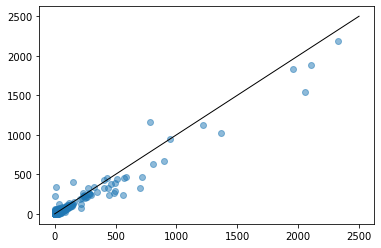

In [37]:
plt.scatter(df_concat['MGnify_ERZ652362'], df_concat['InterPro_ERZ652362'], alpha=0.5)
x1, y1 = [0, 2500], [0, 2500]
plt.plot(x1, y1, color='black', linestyle='-', linewidth=1)
plt.show()

In [45]:
df_concat_nona = df_concat.dropna()

scipy.stats.pearsonr(df_concat_nona['MGnify_ERZ652362'], df_concat_nona['InterPro_ERZ652362'])

(0.9776464445051867, 0.0)

In [87]:
df_concat_MGnify_great = df_concat.query("MGnify_ERZ652362 >  InterPro_ERZ652362")
df_concat_MGnify_great = pd.concat([df_concat_MGnify_great, df_GO['name'][df_GO['name'].notnull()]],axis=1,join="inner")
df_concat_MGnify_great.sort_values('MGnify_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0008934,2,1.0,inositol monophosphate 1-phosphatase activity
GO:0008798,2,1.0,beta-aspartyl-peptidase activity
GO:0006885,2,1.0,regulation of pH
GO:0016153,2,1.0,urocanate hydratase activity
GO:0015558,2,1.0,secondary active p-aminobenzoyl-glutamate tran...
...,...,...,...
GO:0006355,1365,1027.0,"regulation of transcription, DNA-templated"
GO:0003677,1961,1834.0,DNA binding
GO:0016020,2058,1538.0,membrane
GO:0003824,2107,1878.0,catalytic activity


In [88]:
df_concat_MGnify_great.sort_values('InterPro_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0004143,3,1.0,diacylglycerol kinase activity
GO:0016645,3,1.0,"oxidoreductase activity, acting on the CH-NH g..."
GO:0006534,4,1.0,cysteine metabolic process
GO:0009316,2,1.0,3-isopropylmalate dehydratase complex
GO:0004399,16,1.0,histidinol dehydrogenase activity
...,...,...,...
GO:0016021,1219,1121.0,integral component of membrane
GO:0016020,2058,1538.0,membrane
GO:0003677,1961,1834.0,DNA binding
GO:0003824,2107,1878.0,catalytic activity


In [85]:
df_concat_InterPro_great = df_concat.query("MGnify_ERZ652362 <  InterPro_ERZ652362")
df_concat_InterPro_great = pd.concat([df_concat_InterPro_great, df_GO['name'][df_GO['name'].notnull()]],axis=1,join="inner")
df_concat_InterPro_great.sort_values('MGnify_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0034194,0,1.0,D-galactonate catabolic process
GO:0004591,0,1.0,oxoglutarate dehydrogenase (succinyl-transferr...
GO:0044010,0,2.0,single-species biofilm formation
GO:0004722,0,10.0,protein serine/threonine phosphatase activity
GO:0005536,0,1.0,glucose binding
...,...,...,...
GO:0046872,270,324.0,metal ion binding
GO:0007165,325,343.0,signal transduction
GO:0000166,409,428.0,nucleotide binding
GO:0003676,430,451.0,nucleic acid binding


In [89]:
df_concat_InterPro_great.sort_values('InterPro_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0034194,0,1.0,D-galactonate catabolic process
GO:0044209,0,1.0,AMP salvage
GO:0009061,0,1.0,anaerobic respiration
GO:0019213,0,1.0,deacetylase activity
GO:0005384,0,1.0,manganese ion transmembrane transporter activity
...,...,...,...
GO:0007165,325,343.0,signal transduction
GO:0042626,150,402.0,ATPase-coupled transmembrane transporter activity
GO:0000166,409,428.0,nucleotide binding
GO:0003676,430,451.0,nucleic acid binding


In [90]:
df_concat_MGnify_zero = df_concat.query("(MGnify_ERZ652362 == 0 | MGnify_ERZ652362.isnull()) & (InterPro_ERZ652362 != 0 & InterPro_ERZ652362.notnull())")
df_concat_MGnify_zero = pd.concat([df_concat_MGnify_zero, df_GO['name'][df_GO['name'].notnull()]],axis=1,join="inner")
df_concat_MGnify_zero.sort_values('InterPro_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0005384,0,1.0,manganese ion transmembrane transporter activity
GO:0004801,0,1.0,transaldolase activity
GO:0004333,0,1.0,fumarate hydratase activity
GO:0044877,0,1.0,protein-containing complex binding
GO:0047661,0,1.0,amino-acid racemase activity
...,...,...,...
GO:0019346,0,31.0,transsulfuration
GO:0004888,0,31.0,transmembrane signaling receptor activity
GO:0047834,NaN,48.0,D-threo-aldose 1-dehydrogenase activity
GO:1902600,0,57.0,proton transmembrane transport


In [92]:
df_concat_InterPro_zero = df_concat.query("MGnify_ERZ652362 != 0  & MGnify_ERZ652362.notnull() & (InterPro_ERZ652362 == 0 | InterPro_ERZ652362.isnull())")
df_concat_InterPro_zero = pd.concat([df_concat_InterPro_zero, df_GO['name'][df_GO['name'].notnull()]],axis=1,join="inner")
df_concat_InterPro_zero.sort_values('MGnify_ERZ652362')

,MGnify_ERZ652362,InterPro_ERZ652362,name
GO:0004114,1,NaN,"3',5'-cyclic-nucleotide phosphodiesterase acti..."
GO:0000746,1,NaN,conjugation
GO:0050897,1,NaN,cobalt ion binding
GO:0008770,1,NaN,[acyl-carrier-protein] phosphodiesterase activity
GO:0006547,1,NaN,histidine metabolic process
...,...,...,...
GO:0005622,432,NaN,intracellular anatomical structure
GO:0005215,449,NaN,transporter activity
GO:0008152,892,NaN,metabolic process
GO:0006810,1135,NaN,transport
